In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

2024-03-03 15:49:52.002944: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 15:49:52.003101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 15:49:52.190368: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Loading CIFAR-10 data

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
labels = {  0:'airplane',
            1:'automobile', 
            2:'bird', 
            3:'cat', 
            4:'deer',
            5:'dog', 
            6:'frog', 
            7:'horse', 
            8:'ship', 
            9:'truck'} 

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
image = X_train[2]

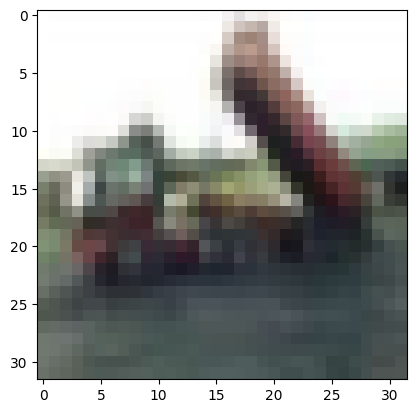

In [8]:
plt.imshow(image) #may be squirrel let's check it

In [9]:
labels[y_train[2][0]]

'truck'

> Since the image is too compressed to (32,32,3) it is actually very difficult for the human eyes to intrepet

## Preprocessing The Data

In [10]:
X_train.max(),X_train.min()

(255, 0)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
y_train_c = to_categorical(y_train,10)

In [14]:
y_test_c = to_categorical(y_test,10)

In [15]:
y_train_c.shape

(50000, 10)

In [16]:
#reshaping
X_train = X_train.reshape(50000,32,32,3)
X_test = X_test.reshape(10000,32,32,3)

## Model Building

In [17]:
model = Sequential()

#CNN
model.add(Conv2D(filters=(32),kernel_size=(4,4),padding='Same',input_shape=(32,32,3),activation='relu'))
#Pooling
model.add(MaxPool2D(pool_size=(4,4)))

#CNN
model.add(Conv2D(filters=(32),kernel_size=(4,4),padding='Same',input_shape=(32,32,3),activation='relu'))
#Pooling
model.add(MaxPool2D(pool_size=(4,4)))
#flatten
model.add(Flatten())
#Dense
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
callback = EarlyStopping(min_delta=0.001,patience=2,restore_best_weights=True)

In [20]:
model.fit(x=X_train,
         y=y_train_c,
         validation_data=(X_test,y_test_c),
         batch_size=256,
         callbacks=[callback],
         epochs=50)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.2666 - loss: 1.9820 - val_accuracy: 0.4284 - val_loss: 1.5655
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.4506 - loss: 1.5049 - val_accuracy: 0.5096 - val_loss: 1.3411
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step - accuracy: 0.5197 - loss: 1.3263 - val_accuracy: 0.5265 - val_loss: 1.2941
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.5580 - loss: 1.2317 - val_accuracy: 0.5718 - val_loss: 1.1947
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.5841 - loss: 1.1577 - val_accuracy: 0.5898 - val_loss: 1.1536
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.6086 - loss: 1.0994 - val_accuracy: 0.6166 - val_loss: 1.0980
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.6265 - loss: 1.0486 - val_accuracy: 0.6192 - val_loss: 1.0827
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.6396 - loss: 1

## Model Evaluation

In [21]:
history = pd.DataFrame(model.history.history)

<Axes: >

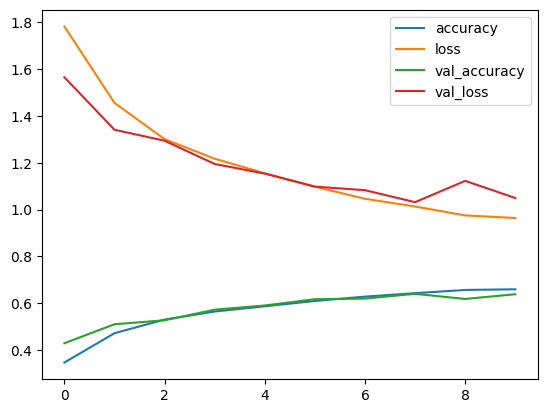

In [22]:
history.plot()

In [23]:
model.evaluate(X_test,y_test_c)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6458 - loss: 1.0173


[1.026077389717102, 0.6395999789237976]

In [24]:
predictions = np.argmax(model.predict(X_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [25]:
accuracy_score(y_test,predictions)

0.6396

In [26]:
confusion_matrix(y_test,predictions)

array([[644,  45,  86,  20,  20,   8,  14,   6, 121,  36],
       [ 12, 797,  17,   3,   2,   6,  11,   4,  45, 103],
       [ 66,   6, 558,  65,  64,  90,  93,  28,  16,  14],
       [ 17,  16, 104, 401,  43, 219, 114,  35,  23,  28],
       [ 25,   8, 129,  68, 457,  51, 130, 106,  21,   5],
       [ 10,   7,  85, 196,  31, 535,  52,  57,  18,   9],
       [  4,  13,  61,  58,  20,  21, 795,   7,  13,   8],
       [ 19,   4,  39,  36,  56, 115,  23, 676,   6,  26],
       [ 49,  42,  10,  15,   7,  15,   4,   6, 827,  25],
       [ 32, 130,   7,  20,   4,  12,  19,  14,  56, 706]])

<Axes: >

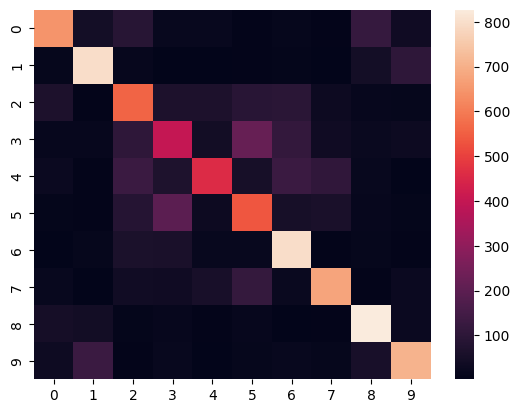

In [27]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.64      0.69      1000
           1       0.75      0.80      0.77      1000
           2       0.51      0.56      0.53      1000
           3       0.45      0.40      0.43      1000
           4       0.65      0.46      0.54      1000
           5       0.50      0.54      0.52      1000
           6       0.63      0.80      0.71      1000
           7       0.72      0.68      0.70      1000
           8       0.72      0.83      0.77      1000
           9       0.74      0.71      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



In [29]:
labels[3],labels[4],labels[5]

('cat', 'deer', 'dog')

### Model heavily troubled in classifying those three classes ('cat', 'deer', 'dog')
### since those three are almost similar in terms of look and also the dim of img is very less(32,32,3)

### Model easily classifies the automobiles suchs as airplane,trucks since they are unique in shape quality of img won't matter at all

# Predictions

In [30]:
sam_img = X_test[9]

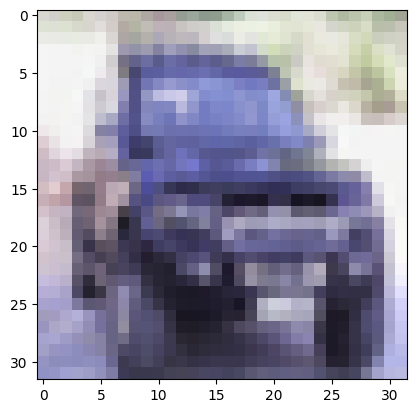

In [31]:
plt.imshow(sam_img)

In [32]:
pred_sam = np.argmax(model.predict(sam_img.reshape(1,32,32,3)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [33]:
labels[pred_sam[0]] #we predict it correctly

'automobile'

In [34]:
#to chec
labels[y_test[9][0]]

'automobile'

In [35]:
#Done